<a href="https://colab.research.google.com/github/felipersdf/machine-learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

url = "https://raw.githubusercontent.com/felipersdf/machine-learning/main/datasets/glass.data"


# #LEGENDA
#    1. Id number: 1 to 214
#    2. RI: refractive index
#    3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
#                   are attributes 4-10)
#    4. Mg: Magnesium
#    5. Al: Aluminum
#    6. Si: Silicon
#    7. K: Potassium
#    8. Ca: Calcium
#    9. Ba: Barium
#   10. Fe: Iron
#   11. Type of glass: (class attribute)
#       -- 1 building_windows_float_processed
#       -- 2 building_windows_non_float_processed
#       -- 3 vehicle_windows_float_processed
#       -- 4 vehicle_windows_non_float_processed (none in this database)
#       -- 5 containers
#       -- 6 tableware
#       -- 7 headlamps

# GLASS
col_names = ['id', 'ri', 'na', 'mg', 'al', 'si', 'K', 'ca', 'ba', 'fe', 'tipo']
feature_cols = ['ri', 'na', 'mg', 'al', 'si', 'K', 'ca', 'ba', 'fe',]


# Carregar base de dados
# DataFrame
dataset = pd.read_csv(url, header=None, names=col_names)

X = dataset[feature_cols] # Atributos (Features)
y = dataset.tipo # Saída

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

print(y_test)

175    5
197    7
34     1
207    7
7      1
167    5
85     2
18     1
155    3
200    7
96     2
120    2
25     1
171    5
105    2
75     2
1      1
144    2
23     1
49     1
116    2
113    2
181    6
150    3
22     1
160    3
6      1
35     1
179    6
66     1
65     1
203    7
72     2
37     1
189    7
62     1
78     2
123    2
84     2
136    2
114    2
202    7
135    2
Name: tipo, dtype: int64


In [25]:
# Treinamendo da Árvore de Decisão
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train, y_train)

# Treinamendo da Árvore de Decisão
# model = tree.DecisionTreeClassifier(criterion="gini")
# model = model.fit(X_train, y_train)

In [26]:
# Predição e Resultados

result = model.predict(X_test)
acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)
print("{}%".format(show))

print(list(result))
print(list(y_test))

74.0%
[2, 7, 1, 7, 1, 5, 2, 1, 1, 7, 2, 2, 1, 5, 2, 2, 3, 1, 1, 1, 2, 2, 6, 2, 1, 2, 1, 2, 6, 1, 3, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 7, 1]
[5, 7, 1, 7, 1, 5, 2, 1, 3, 7, 2, 2, 1, 5, 2, 2, 1, 2, 1, 1, 2, 2, 6, 3, 1, 3, 1, 1, 6, 1, 1, 7, 2, 1, 7, 1, 2, 2, 2, 2, 2, 7, 2]


[Text(141.66225, 206.56799999999998, 'X[2] <= 2.695\nentropy = 2.171\nsamples = 171\nvalue = [56, 61, 14, 10, 7, 23]'),
 Text(53.568000000000005, 184.824, 'X[1] <= 13.785\nentropy = 1.894\nsamples = 49\nvalue = [0, 12, 0, 10, 7, 20]'),
 Text(26.784000000000002, 163.07999999999998, 'X[3] <= 1.38\nentropy = 1.234\nsamples = 20\nvalue = [0, 10, 0, 9, 0, 1]'),
 Text(13.392000000000001, 141.336, 'X[6] <= 9.96\nentropy = 0.544\nsamples = 8\nvalue = [0, 7, 0, 0, 0, 1]'),
 Text(6.696000000000001, 119.592, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1]'),
 Text(20.088, 119.592, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0, 0, 0]'),
 Text(40.176, 141.336, 'X[8] <= 0.085\nentropy = 0.811\nsamples = 12\nvalue = [0, 3, 0, 9, 0, 0]'),
 Text(33.480000000000004, 119.592, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 0, 8, 0, 0]'),
 Text(46.87200000000001, 119.592, 'X[3] <= 2.135\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 0, 1, 0, 0]'),
 Text(40.176, 97.848, 'entropy = 0.0\nsamples = 3\nv

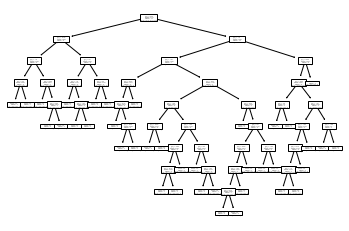

In [27]:
tree.plot_tree(model) 